In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
url = '/content/auto-mpg.data-original'
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']
data = pd.read_csv(url, sep='\s+', names=column_names)

In [ ]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     406 non-null    float64
 2   displacement  406 non-null    float64
 3   horsepower    400 non-null    float64
 4   weight        406 non-null    float64
 5   acceleration  406 non-null    float64
 6   model_year    406 non-null    float64
 7   origin        406 non-null    float64
 8   car_name      406 non-null    object 
dtypes: float64(8), object(1)
memory usage: 28.7+ KB


In [ ]:
data['horsepower'] = pd.to_numeric(data['horsepower'], errors='coerce')
data.dropna(inplace=True)

In [ ]:
X = data[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin']]
y = data['mpg']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train = X_train.dropna()
y_train = y_train.dropna()
X_test = X_test.dropna()
y_test = y_test.dropna()

In [ ]:
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [ ]:
X_train = X_train.loc[y_train.index]

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')

Mean Squared Error: 10.710864418838366
R2 Score: 0.7901500386760351


In [ ]:
r3 = model.score(X_test, y_test)
print('Coefficient of determination:', r3)

Coefficient of determination: 0.7901500386760351


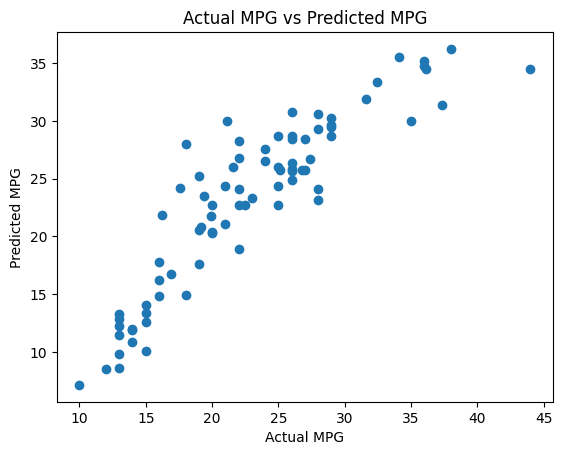

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.title('Actual MPG vs Predicted MPG')
plt.show()

<Axes: xlabel='cylinders', ylabel='mpg'>

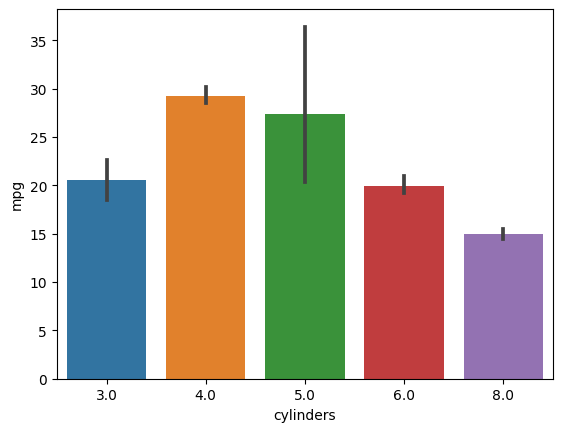

In [ ]:
import seaborn as sns
sns.barplot(x='cylinders',y='mpg',data=data)

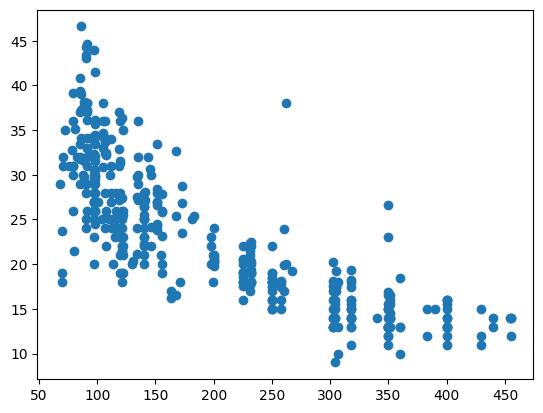

In [ ]:
plt.scatter(x='displacement',y='mpg',data=data)

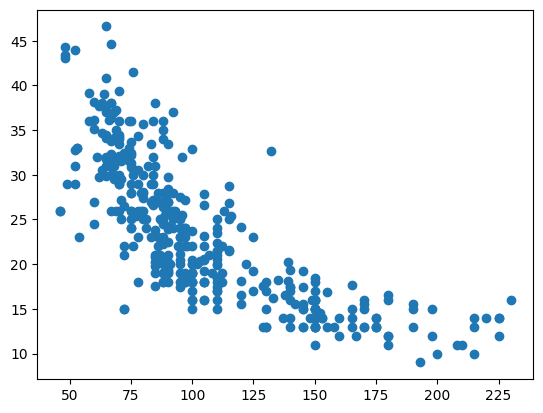

In [ ]:
plt.scatter(x='horsepower',y='mpg',data=data)

<ipython-input-61-4465ca1ca60d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.model_year)


<Axes: xlabel='model_year', ylabel='Density'>

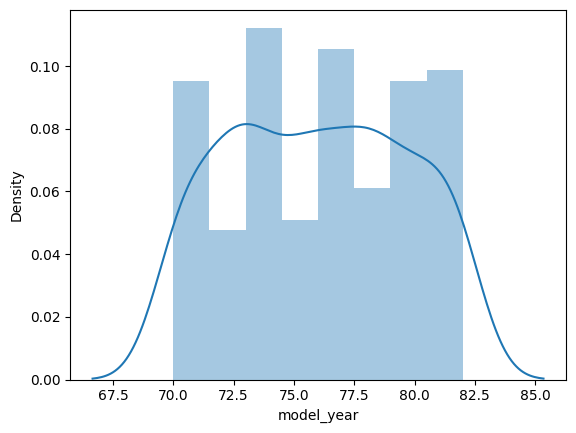

In [ ]:
# plt.scatter(x='model_year',y='mpg',data=data)
sns.distplot(data.model_year)

<ipython-input-63-32a5c28c6cac>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.origin)


<Axes: xlabel='origin', ylabel='Density'>

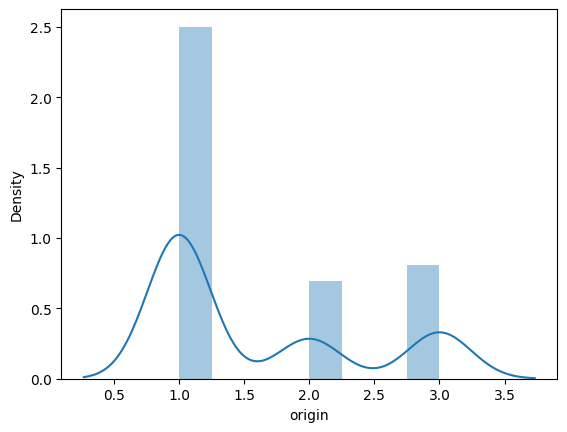

In [ ]:
sns.distplot(data.origin)

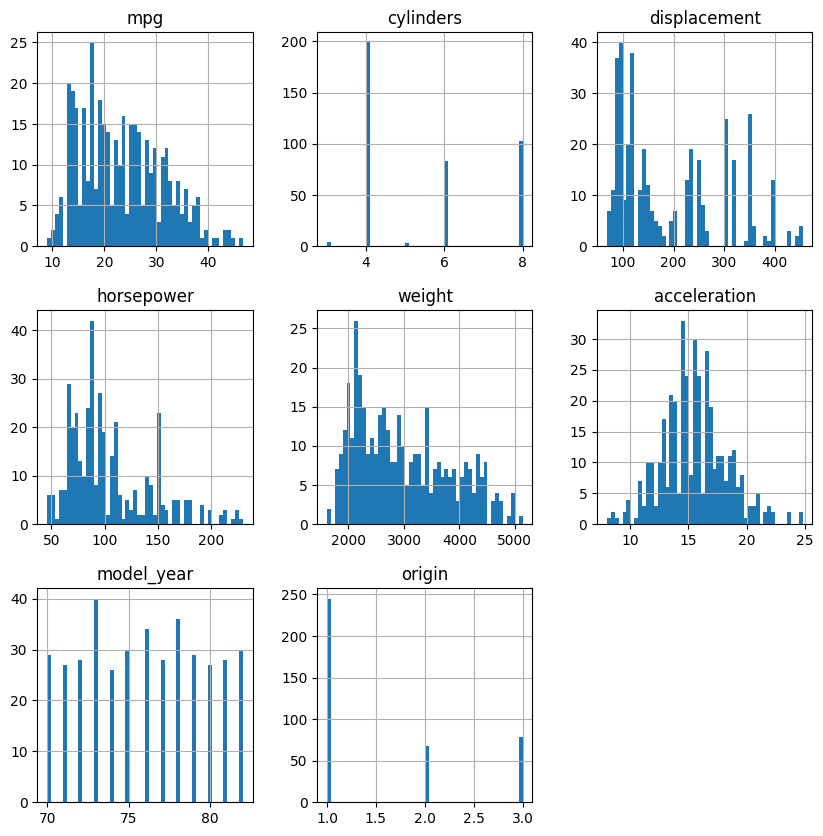

In [ ]:
import matplotlib.pyplot as plt

data.hist(bins=50,figsize=(10,10))
plt.show()

<ipython-input-51-f3fc9ec94731>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_data = data.corr()


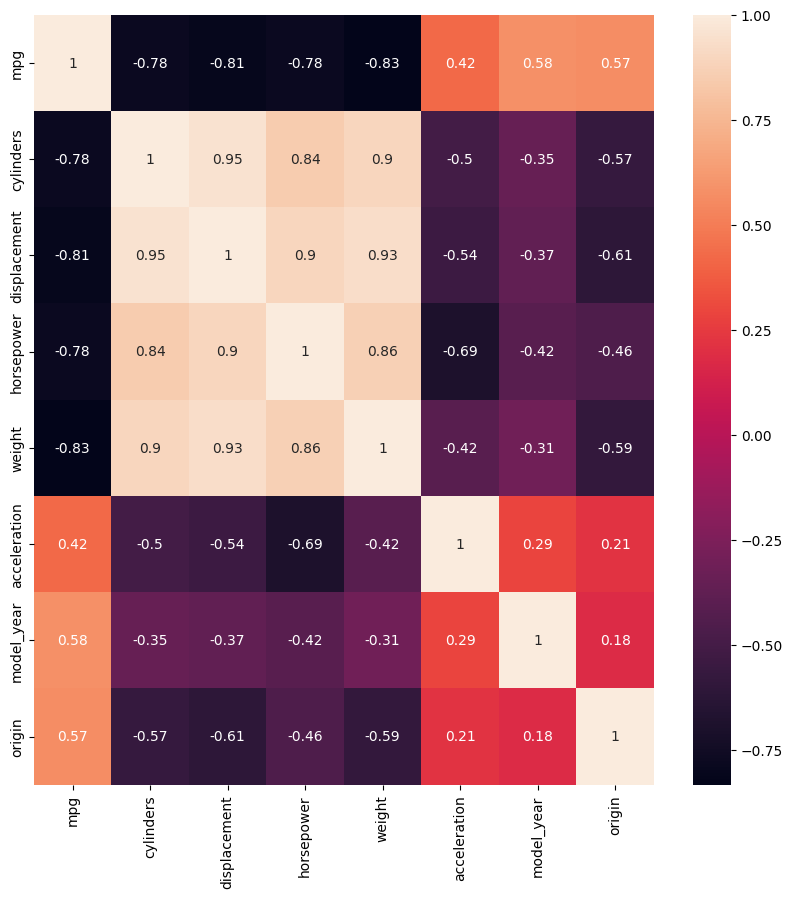

In [ ]:
import seaborn as sns
corr_data = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_data,annot=True)
plt.show()